# Example 1: Intersecting Gaussians

### function to sample from the product of two guassian

In [1]:
from scipy.stats import multivariate_normal
def sample_from_product_gaussian(mu1, Sigma1, mu2, Sigma2, n_samples):
    """
    Sample from the product of two Gaussian distributions.

    Parameters:
    mu1 (array): Mean vector of the first Gaussian distribution.
    Sigma1 (array): Covariance matrix of the first Gaussian distribution.
    mu2 (array): Mean vector of the second Gaussian distribution.
    Sigma2 (array): Covariance matrix of the second Gaussian distribution.
    n_samples (int): Number of samples to draw from the resulting Gaussian.

    Returns:
    array: Samples from the resulting product Gaussian distribution.
    """
    # Calculate the inverse of the covariances
    Sigma1_inv = np.linalg.inv(Sigma1)
    Sigma2_inv = np.linalg.inv(Sigma2)

    # Calculate the covariance of the resulting distribution
    Sigma3_inv = Sigma1_inv + Sigma2_inv
    Sigma3 = np.linalg.inv(Sigma3_inv)

    # Calculate the mean of the resulting distribution
    mu3 = Sigma3.dot(Sigma1_inv.dot(mu1) + Sigma2_inv.dot(mu2))

    # Create the resulting Gaussian distribution
    resulting_distribution = multivariate_normal(mean=mu3, cov=Sigma3)

    # Sample from the resulting distribution
    samples = resulting_distribution.rvs(size=n_samples)

    return samples

### make the two Gaussian distributions and plot some samples

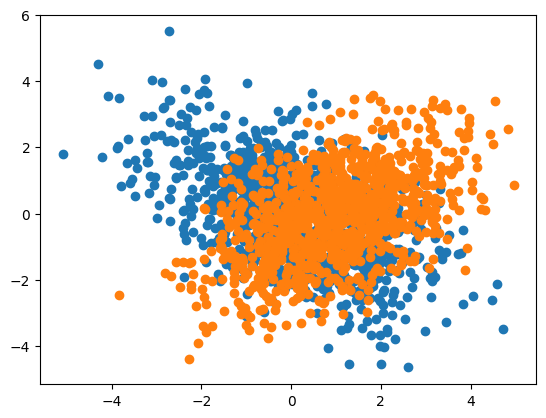

In [2]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([1,0])

cov1 = np.array([[1, 0], [0, 4]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples1[:,0], samples1[:,1])
plt.scatter(samples2[:,0], samples2[:,1])

### Run CombineHarvester

In [3]:
from CombineHarvester import Harvest
from CombineHarvester import Combine
import getdist.plots as gdplt
from getdist import MCSamples


num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


 13%|█████▎                                   | 13/100 [00:11<01:18,  1.10it/s, train=2.6285796, val=2.6237738 (Max patience reached)]


Training the flows


  8%|███▍                                       | 8/100 [00:08<01:36,  1.05s/it, train=2.704371, val=2.7388198 (Max patience reached)]


### Make the plots

In [4]:
plt.rc('text', usetex=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


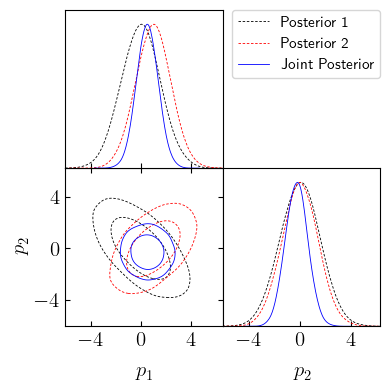

In [5]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_1.pdf')
plt.show()

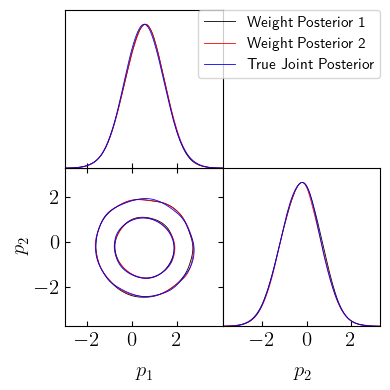

In [6]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_1_posteriors.pdf')
plt.show()

# Example 2: Gaussians in Tension

### make the two Gaussians and draw some samples

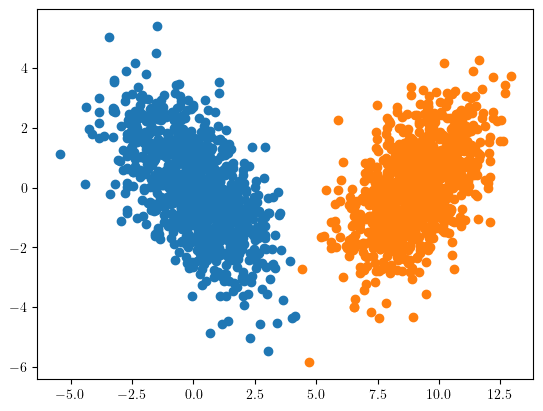

In [7]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([9,0])

cov1 = np.array([[1, 0], [0, 4]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples1[:,0], samples1[:,1])
plt.scatter(samples2[:,0], samples2[:,1])

### Run CombineHarvester

In [8]:

num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


 10%|████▏                                     | 10/100 [00:09<01:28,  1.02it/s, train=2.632345, val=2.6079257 (Max patience reached)]


Training the flows


 19%|████████▏                                  | 19/100 [00:15<01:06,  1.21it/s, train=2.7031536, val=2.72075 (Max patience reached)]


### Make some plots

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


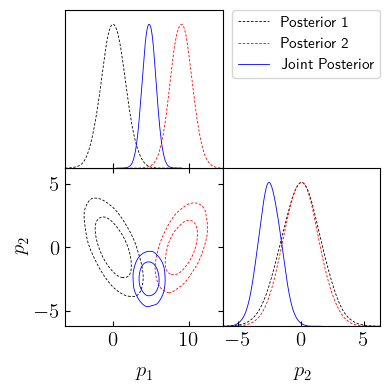

In [9]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_2.pdf')
plt.show()

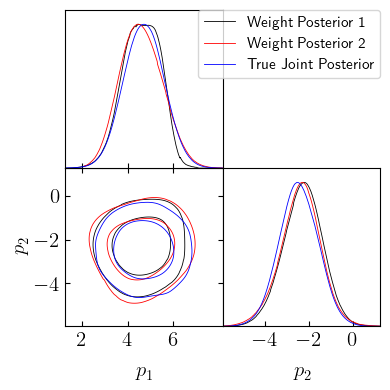

In [10]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_2_posteriors.pdf')
plt.show()

# Example 3: Undersampling 

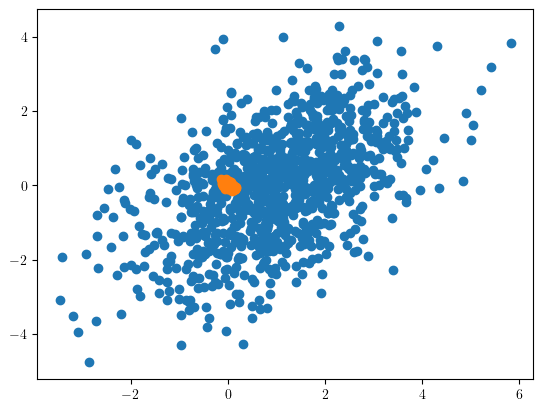

In [11]:
import numpy as np
from matplotlib import pyplot as plt

mean1 = np.zeros(2)
mean2 = np.array([1,0])

cov1 = np.array([[1/1000., 0], [0, 4/1000.]])
cov2 = np.array([[3, 0], [0, 1]])

# Rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Rotation matrix
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Function to rotate covariance matrix
def rotate_covariance(cov, R):
    return R @ cov @ R.T

# Rotate cov1 and cov2
cov1 = rotate_covariance(cov1, R)
cov2 = rotate_covariance(cov2, R)

samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)
plt.scatter(samples2[:,0], samples2[:,1])
plt.scatter(samples1[:,0], samples1[:,1])


In [12]:

num_samples = 20000


#sample from the distributions
wheat_chain = np.random.multivariate_normal(mean1, cov1, num_samples)
barley_chain = np.random.multivariate_normal(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()



Training the flows


  8%|███▎                                      | 8/100 [00:08<01:37,  1.06s/it, train=2.6314478, val=2.6501298 (Max patience reached)]


Training the flows


  8%|███▎                                      | 8/100 [00:08<01:37,  1.06s/it, train=2.7069545, val=2.7439413 (Max patience reached)]


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


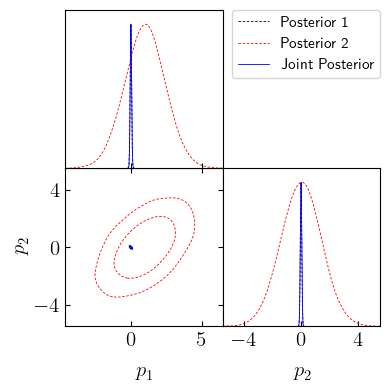

In [13]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_3.pdf')
plt.show()

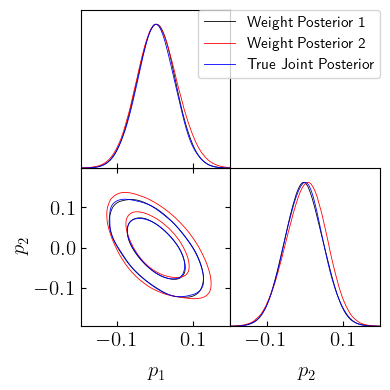

In [14]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_3_posteriors.pdf')
plt.show()

# Example 4: Adjust Priors to resolve undersampling

## Same as last example but we enforce x,y in [-0.25, 0.25]

In [16]:

num_samples = 20000


def get_filtered_samples(mean, cov, num_samples):
    samples = np.random.multivariate_normal(mean, cov, num_samples)
    # Filter samples where both x and y lie within [-0.25, 0.25]
    filtered_samples = samples[(samples[:, 0] >= -0.25) & (samples[:, 0] <= 0.25) &
                           (samples[:, 1] >= -0.25) & (samples[:, 1] <= 0.25)]
    accepted_samples = []
    while len(accepted_samples) < num_samples:
        samples = np.random.multivariate_normal(mean, cov, num_samples)
        valid_samples = samples[(samples[:, 0] >= -0.25) & (samples[:, 0] <= 0.25) &
                                (samples[:, 1] >= -0.25) & (samples[:, 1] <= 0.25)]
        accepted_samples.extend(valid_samples.tolist())  # Convert numpy array to list for extending
        if len(accepted_samples) > num_samples:
            accepted_samples = accepted_samples[:num_samples]  # Truncate to 20000 samples
    return np.array(accepted_samples)


#sample from the distributions
wheat_chain = get_filtered_samples(mean1, cov1, num_samples)
barley_chain = get_filtered_samples(mean2, cov2, num_samples)
truth_chains = sample_from_product_gaussian(mean1, cov1, mean2, cov2, num_samples)

In [17]:
#initiate the the class
Wheat = Harvest('output/Wheat', chain = wheat_chain, n_flows = 7) 
Barley = Harvest('output/Barley', chain = barley_chain, n_flows = 7)


#train the flows
Wheat.harvest()
Barley.harvest()

#combine
Grain = Combine(Wheat, Barley)
wheat_weights, barley_weights = Grain.combine()

Training the flows


 12%|█████                                     | 12/100 [00:11<01:20,  1.09it/s, train=2.632051, val=2.6263301 (Max patience reached)]


Training the flows


 32%|█████████████▍                            | 32/100 [00:24<00:52,  1.29it/s, train=2.5164607, val=2.512181 (Max patience reached)]


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


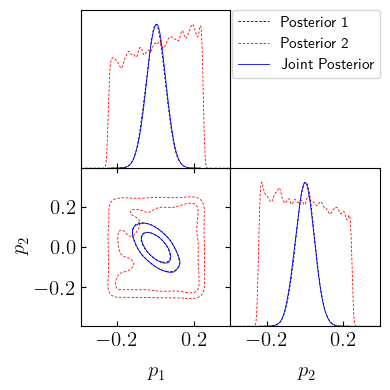

In [18]:
import getdist.plots as gdplt
from getdist import MCSamples

wheat = MCSamples(samples=wheat_chain)
barley = MCSamples(samples=barley_chain)
weighted_wheat =  MCSamples(samples=wheat_chain, weights=wheat_weights)
weighted_barley =  MCSamples(samples=barley_chain, weights=barley_weights)
truth = MCSamples(samples=truth_chains)

g = gdplt.get_subplot_plotter()

g.settings.axes_fontsize = 18  
g.settings.lab_fontsize = 18    
g.settings.legend_fontsize = 14 

line_styles = ['--', '--', '-']
g.triangle_plot([wheat, barley, truth], filled=False, \
                legend_labels=['Posterior 1', 'Posterior 2',  'Joint Posterior'], contour_ls=line_styles )

plt.savefig('plots/toy_4.pdf')
plt.show()

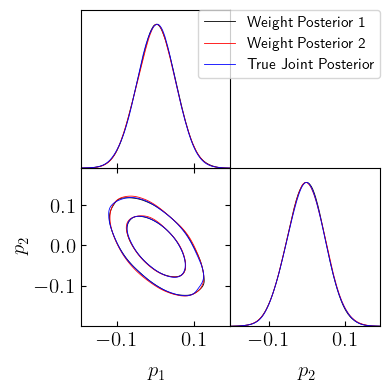

In [19]:
g.triangle_plot([weighted_wheat, weighted_barley, truth], filled=False, \
                legend_labels=['Weight Posterior 1', 'Weight Posterior 2',  ' True Joint Posterior'])
plt.savefig('plots/toy_4_posteriors.pdf')
plt.show()